In [2]:
import pandas as pd
import cdt
import pickle
import networkx as nx
import matplotlib.pyplot as plt

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.


In [23]:
# read data
df = pd.read_csv('../../data/session-df-ak.csv')
cols = ['skip_1', 'hour_of_day', 'session_position', 'premium']
df = df[cols]
#df = pickle.load( open( "../../data/df_causal_discovery.p", "rb") )

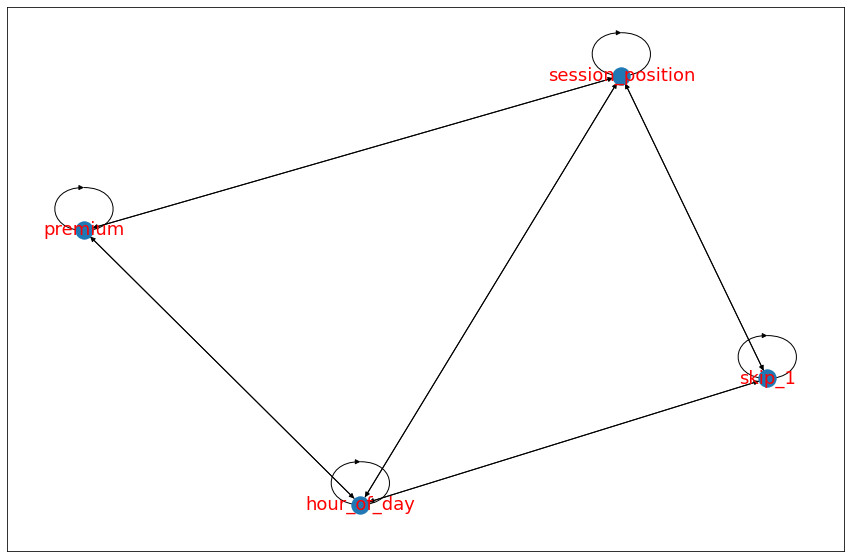

In [27]:
# Get skeleton graph
# initialize graph lasso
glasso = cdt.independence.graph.Glasso()

# apply graph lasso to data
skeleton = glasso.predict(df)# visualize network
fig = plt.figure(figsize=(15,10))
nx.draw_networkx(skeleton, font_size=18, font_color='r')

PC is ran on the skeleton of the given graph.


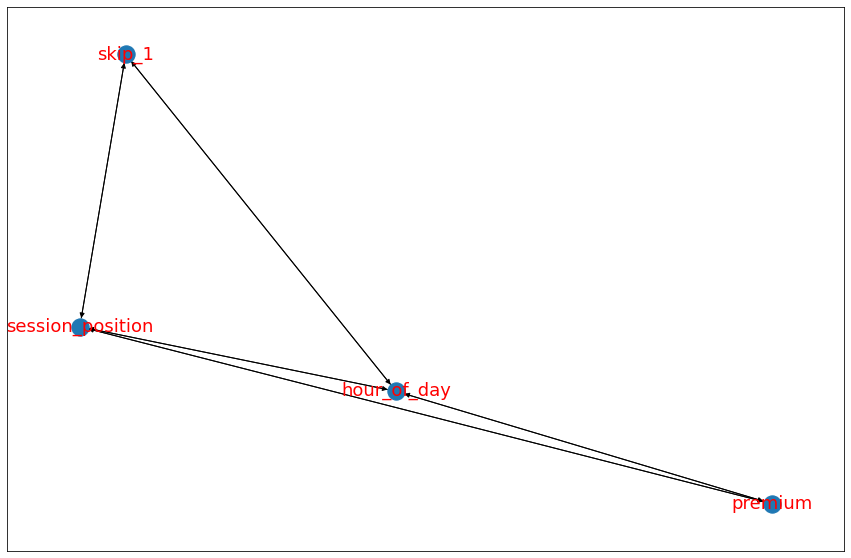

In [28]:
# Use causal discovery to get causal models# PC algorithm
model_pc = cdt.causality.graph.PC()
graph_pc = model_pc.predict(df, skeleton)

# visualize network
fig=plt.figure(figsize=(15,10))
nx.draw_networkx(graph_pc, font_size=18, font_color='r')

In [12]:
df.columns

Index(['Unnamed: 0', 'session_id', 'session_position', 'session_length',
       'track_id_clean', 'skip_1', 'skip_2', 'skip_3', 'not_skipped',
       'context_switch', 'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'date', 'premium', 'context_type',
       'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end',
       'is_skip', 'skip'],
      dtype='object')

In [26]:
df.skip_1 = df.skip_1.astype(int)

In [25]:
df.premium = df.premium.astype(int)

In [34]:
from cdt.causality.graph import LiNGAM
obj = LiNGAM()
x = obj.predict(df)

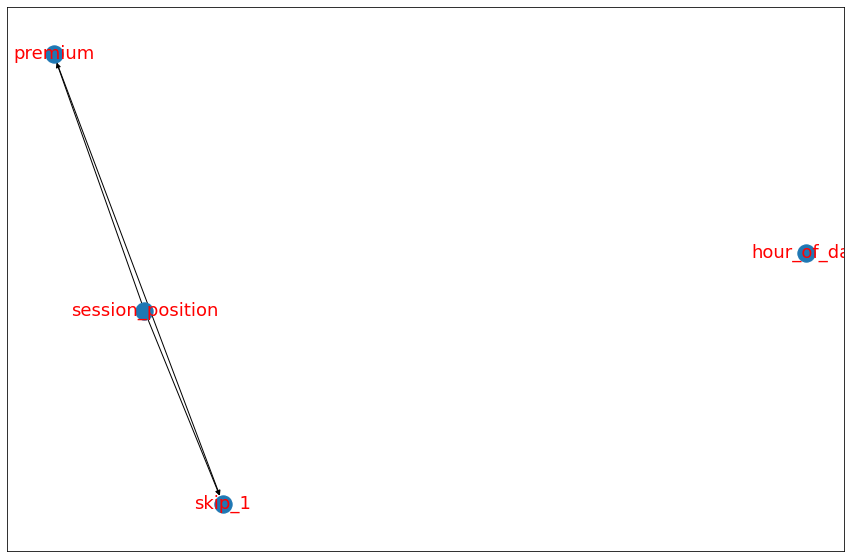

In [35]:
fig=plt.figure(figsize=(15,10))
nx.draw_networkx(x, font_size=18, font_color='r')